In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tqdm.auto import tqdm
import pickle

In [3]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.0 MB/s eta 0:00:00


## Load the data

## Train and Validation Split

In [4]:
# run for second time
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
file_path = "preprocessed_data_lemmatizer.csv"
preprocessed_data_path = folder_path + file_path
df = pd.read_csv(preprocessed_data_path)

In [5]:
# run for second time
df.head()

,id,category,text
0,2009.0642,cs,completely self supervised crowd counting via ...
1,2010.13821,cs,wavelet flow fast training high resolution nor...
2,1904.12782,math,transversally elliptic complex cohomological f...
3,2105.00878,math,malliavin rubel theorem small entire function ...
4,1906.04024,math,odd cycle game connected rule study positional...


In [6]:
# run for second time
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
le.fit(df["category"])

label = le.transform(df["category"])

df["label"] = label
df.head()

,id,category,text,label
0,2009.0642,cs,completely self supervised crowd counting via ...,3
1,2010.13821,cs,wavelet flow fast training high resolution nor...,3
2,1904.12782,math,transversally elliptic complex cohomological f...,12
3,2105.00878,math,malliavin rubel theorem small entire function ...,12
4,1906.04024,math,odd cycle game connected rule study positional...,12


In [7]:
category_list = df.category.unique()

In [8]:
label_list = list(range(0, 23))
le.inverse_transform(label_list)

array(['alg-geom', 'astro-ph', 'cond-mat', 'cs', 'econ', 'eess',
       'funct-an', 'gr-qc', 'hep-ex', 'hep-lat', 'hep-ph', 'hep-th',
       'math', 'math-ph', 'nlin', 'nucl-ex', 'nucl-th', 'physics',
       'q-alg', 'q-bio', 'q-fin', 'quant-ph', 'stat'], dtype=object)

In [9]:
df.category.nunique()

23

In [10]:
df.category.value_counts()

cs          262503
math        177679
cond-mat     71772
physics      66282
astro-ph     58737
stat         51308
eess         34330
quant-ph     25171
hep-th       19706
hep-ph       19207
gr-qc        15590
math-ph      12238
q-bio        10530
hep-ex        7435
nucl-th       6662
nlin          6047
q-fin         5942
econ          3924
nucl-ex       3627
hep-lat       2538
q-alg            2
funct-an         1
alg-geom         1
Name: category, dtype: int64

In [11]:
value_counts_1_category = ["alg-geom", "funct-an"]

In [12]:
al_geom = df.loc[df["category"] == "alg-geom"]
funct_an = df.loc[df["category"]=="funct-an"]

In [13]:
al_geom

,id,category,text,label
402494,alg-geom/9411011,alg-geom,classification variety canonical curve section...,0


In [14]:
type(funct_an)

pandas.core.frame.DataFrame

In [15]:
df = pd.concat([df, al_geom, funct_an], axis = 0)

In [16]:
df.category.value_counts()

cs          262503
math        177679
cond-mat     71772
physics      66282
astro-ph     58737
stat         51308
eess         34330
quant-ph     25171
hep-th       19706
hep-ph       19207
gr-qc        15590
math-ph      12238
q-bio        10530
hep-ex        7435
nucl-th       6662
nlin          6047
q-fin         5942
econ          3924
nucl-ex       3627
hep-lat       2538
funct-an         2
alg-geom         2
q-alg            2
Name: category, dtype: int64

In [17]:
# run for second time
X = df["text"]
y = df["label"]

In [18]:
# run for second time
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=101, stratify=df[["label"]])

In [19]:
# run for second time
print(f"Train data size : {len(X_train)} \nVal_data_size : {len(X_val)}")

Train data size : 775110 
Val_data_size : 86124


In [20]:
# run for second time
type(X_train), type(X_val)

(pandas.core.series.Series, pandas.core.series.Series)

In [21]:
# run for second time
y_train.nunique()

23

In [22]:
y_val.nunique()

20

## Data Exploration for UNIQUE WORD COUNT AND MAX PADDING LENGTH

In [23]:
# unique_word_dict can be used to choose the optimal number of vocabs
# length list can be used to choose the padding length for the tokenization process
def findUniqueWord(text_series : pd.core.series.Series):
  """
  Function to find the count of the unique words and length of the articles
  
  Arguments:
    text_series : series of text data
  
  Output:
    unique_word_dict : dictionary with unique word and its count in the text data
    length : list of length of each article
  """
  unique_word_dict = {}
  length = []
  for sentence in tqdm(text_series):
    words = sentence.split()
    length.append(len(words)) 
    for word in words:
      unique_word_dict[word] = unique_word_dict.get(word, 0) + 1
  
  return length, unique_word_dict

In [24]:
length, unique_word_dict = findUniqueWord(X_train)

  0%|          | 0/775110 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


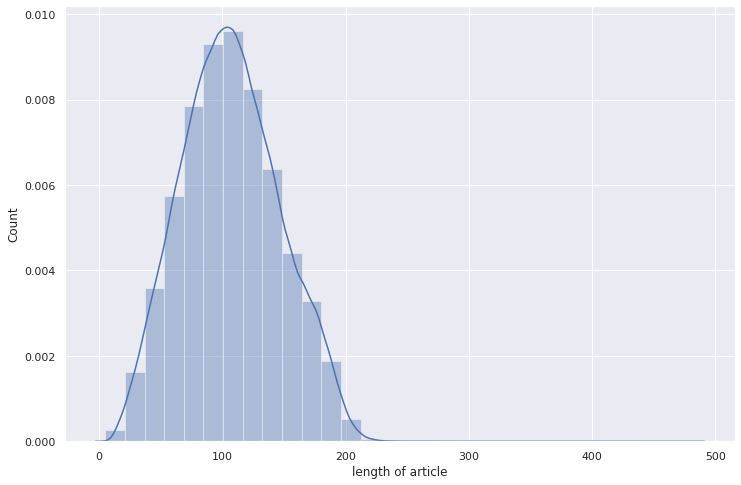

In [25]:
sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.distplot(length, bins = 30, hist = True, kde = True)
ax.set(xlabel = "length of article", ylabel = "Count")
plt.show()

In [26]:
pd.Series(length).describe()

count    775110.000000
mean        106.965778
std          39.876902
min           5.000000
25%          78.000000
50%         105.000000
75%         134.000000
max         483.000000
dtype: float64

In [27]:
len_gt_250 = [i for i in length if i > 150]
print(len_gt_250)
len(len_gt_250)

[193, 167, 156, 161, 170, 199, 157, 170, 172, 167, 176, 162, 155, 214, 160, 175, 164, 155, 178, 157, 157, 172, 157, 166, 211, 168, 151, 183, 158, 157, 168, 167, 154, 163, 182, 173, 199, 176, 183, 163, 169, 177, 188, 165, 164, 155, 183, 191, 162, 180, 186, 177, 167, 188, 175, 154, 158, 186, 167, 167, 212, 181, 168, 184, 189, 161, 170, 184, 212, 156, 179, 191, 167, 178, 160, 186, 155, 173, 156, 166, 158, 191, 180, 186, 178, 195, 156, 182, 153, 202, 182, 159, 176, 156, 177, 182, 176, 155, 151, 164, 181, 153, 165, 164, 156, 199, 153, 151, 152, 154, 159, 187, 161, 161, 151, 206, 167, 153, 183, 163, 175, 179, 174, 180, 174, 177, 160, 189, 158, 166, 160, 176, 186, 151, 151, 159, 162, 193, 193, 210, 161, 159, 196, 165, 183, 172, 187, 152, 191, 161, 168, 205, 182, 191, 153, 162, 211, 158, 177, 170, 174, 171, 194, 164, 179, 153, 156, 162, 155, 165, 172, 163, 159, 169, 185, 175, 168, 151, 187, 186, 184, 190, 152, 180, 174, 151, 169, 173, 162, 194, 160, 155, 177, 154, 179, 178, 176, 182, 194, 175,

117543

In [28]:
type(list(unique_word_dict.values()))

list

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


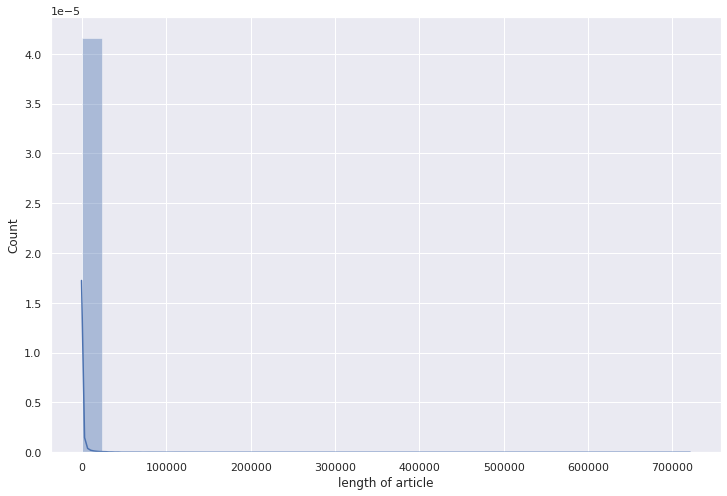

In [29]:
word_count_list = list(unique_word_dict.values())
ax = sns.distplot(word_count_list, bins = 30, hist = True, kde = True)
ax.set(xlabel = "length of article", ylabel = "Count")
plt.show()

In [30]:
print(f"Total number of words in the text : {len(word_count_list)}")

Total number of words in the text : 537986


In [31]:
threshold_word_count = 50

In [32]:
len([i for i in word_count_list if i < threshold_word_count])

505607

In [33]:
len([i for i in word_count_list if i > threshold_word_count])

32020

In [34]:
for word, count in unique_word_dict.items():
  if count > threshold_word_count:
    print(word)

Streaming output truncated to the last 5000 lines.
depleting
2circ
refrigeration
bfv
obstructing
rrn
suffix
vmo
coriolis
pmf
cosy
xh
5548
decorrelate
itinerary
operationalized
micellar
origami
blinding
ctl
arq
676
crustal
jenkins
retrial
retry
lorawan
nge2
nlsp
elln
mathfrakh
qh
qsh
nur
mfr
gso
hansen
unpredicted
enlightened
ife
dob
978
stressor
mce
huggins
lsbgs
chc
capsid
mess
plaque
dagger
reinsurance
cork
aspire
plankton
phytoplankton
taxonomic
algal
decremental
phc
pulsing
buck
radiomic
stss
thermoelectricity
subchannel
broadcasted
permutable
peclet
lightlike
qnec
gapping
cit
fels
assimilated
hei
feii
1917
kuka
trinomials
svdd
lcf
metamodeling
reno
metamodels
mimicker
asf
frac1e
homogenize
2d3d
chic1
groundtruth
semiprime
zassenhaus
cosi
f4
ai2
1cm
2times10
fueling
proteomics
kappag
2k1
fekete
unnaturally
1s0
plasmoid
thermomagnetic
htl
strenuous
naco
sai
mmag
extremity
bradley
reidemeister
microalgae
pond
mall
hyperinterpolation
pneq
backpropagated
kims
balakrishnan
choquard
lobe

## Tokenization

In [35]:
# run for second time
UNIQUE_WORD_COUNT = 30_000
MAX_PAD_LENGTH = 140

In [36]:
# run for second time
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = UNIQUE_WORD_COUNT)

In [37]:
# tokenizer.fit_on_texts(X_train)

In [38]:
# # saving
# folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
# tokenizer_path = 'tokenizer.pickle'
# with open(folder_path + tokenizer_path, 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [39]:
# run for second time
# loading
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
tokenizer_path = 'tokenizer.pickle'
with open(folder_path + tokenizer_path, 'rb') as handle:
    tokenizer = pickle.load(handle)

## One Hot Encoding for X data

In [124]:
X_train

155036    hexagonal boron nitride phononic crystal waveg...
314614    correlation bound one dimensional continuous l...
590893    intelligent software web agent gap analysis se...
33451     european historical evidence supernova ad 1054...
829947    stealthy efficient adversarial attack deep rei...
                                ...                        
470261    compositional layering io driven magmatic segr...
364624    one hundred select best predicted sequence num...
685212    descriptive property higher kurepa tree use ge...
838245    stray demagnetizing field homogeneously magnet...
650456    digital social contract foundation egalitarian...
Name: text, Length: 775110, dtype: object

In [40]:
# run for second time
train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences[0])
train_padded = pad_sequences(train_sequences, maxlen = MAX_PAD_LENGTH, padding = 'post', truncating = 'post')
print(train_padded[0])

[3482, 4608, 4180, 7092, 812, 2328, 3482, 4608, 4180, 721, 3984, 22, 8516, 2312, 2786, 3396, 6890, 2837, 812, 710, 2230, 307, 55, 4441, 1629, 196, 388, 1917, 13, 70, 652, 3969, 4372, 1366, 1540, 23, 1171, 595, 1979, 721, 3984, 7092, 812, 2328, 645, 2876, 4116, 352, 769, 183, 2506, 137, 3200, 115, 874, 759, 7120, 858, 513, 721, 3984, 11256, 2367, 243, 790, 167, 124, 1316, 7092, 812, 2328, 10978, 411, 1567, 2954, 22582, 3513, 115, 874, 1126, 3125, 2175, 1163, 14, 979, 812, 280, 7092, 13697, 3510, 197, 190, 2043, 873, 721, 3984, 7092, 2328, 4313, 4892, 1166, 115, 12626, 721, 3984, 682, 126, 1870, 243, 51, 8689, 256, 24, 1561, 995, 2301, 146, 385, 294, 127, 1540, 721, 3984, 1695, 7092, 253]
[ 3482  4608  4180  7092   812  2328  3482  4608  4180   721  3984    22
  8516  2312  2786  3396  6890  2837   812   710  2230   307    55  4441
  1629   196   388  1917    13    70   652  3969  4372  1366  1540    23
  1171   595  1979   721  3984  7092   812  2328   645  2876  4116   352
   769   183

In [41]:
# run for second time
val_sequences = tokenizer.texts_to_sequences(X_val)
print(val_sequences[0])
val_padded = pad_sequences(val_sequences, maxlen = MAX_PAD_LENGTH, padding = "post", truncating = "post")
print(val_padded[0])

[478, 381, 397, 63, 144, 203, 70, 4908, 172, 503, 397, 63, 144, 27038, 561, 1639, 2412, 4653, 59, 203, 70, 1, 17, 152, 4908, 172, 1, 23, 7363, 1, 203, 178, 1025, 24895, 82, 91, 4908, 172, 1159, 278, 27038, 478, 195, 1905, 3653, 51, 3385, 488, 25, 288, 23, 123, 779, 254, 142, 27038, 4235, 2048, 269, 628, 95, 1653, 76, 172, 18, 302, 492, 21386, 1478, 45, 946, 478, 55]
[  478   381   397    63   144   203    70  4908   172   503   397    63
   144 27038   561  1639  2412  4653    59   203    70     1    17   152
  4908   172     1    23  7363     1   203   178  1025 24895    82    91
  4908   172  1159   278 27038   478   195  1905  3653    51  3385   488
    25   288    23   123   779   254   142 27038  4235  2048   269   628
    95  1653    76   172    18   302   492 21386  1478    45   946   478
    55     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     

## Over Sampling and Under Sampling of the datasets

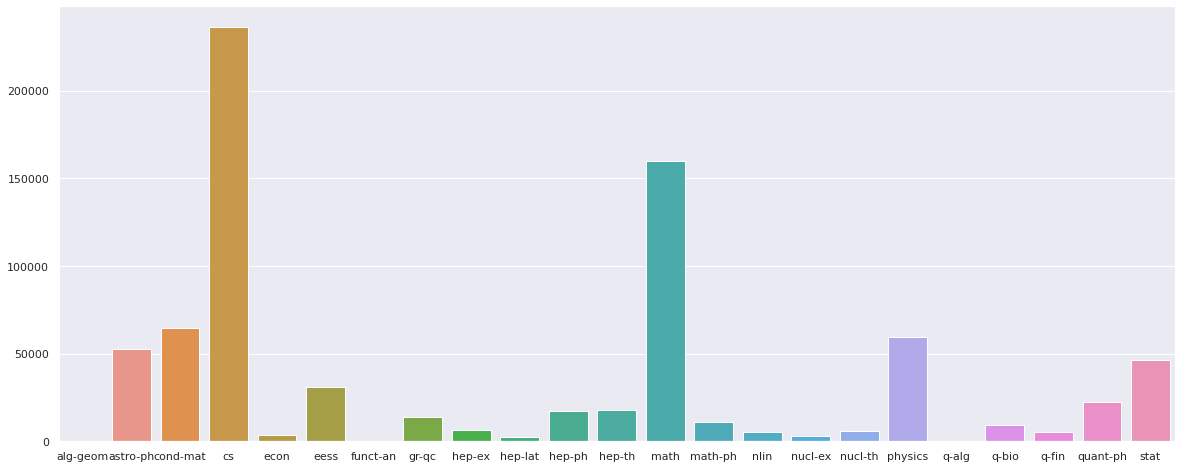

In [42]:
value_counts_y_train = list(y_train.value_counts().sort_index())
label_list = list(range(0, 23))
category_list = le.inverse_transform(label_list)
sns.set(rc={"figure.figsize":(20, 8)})
sns.barplot(x = category_list, y = value_counts_y_train)

In [43]:
print(value_counts_y_train)

[2, 52863, 64595, 236253, 3532, 30897, 2, 14031, 6691, 2284, 17286, 17735, 159911, 11014, 5442, 3264, 5996, 59654, 2, 9477, 5348, 22654, 46177]


From graph, it is clear that the data is highly imbalanced.

For balancing the data
1. Oversample the data with count  < 15_000 to 15_000
2. Under sample the data with count  > 50_000 to 50_0000

In [44]:
count_dict_oversample = {}
threshold = 5_000
for i in range(23):
  if value_counts_y_train[i] < threshold:
    count_dict_oversample[i] = threshold
  else:
    count_dict_oversample[i] = value_counts_y_train[i]
count_dict_oversample

{0: 5000,
 1: 52863,
 2: 64595,
 3: 236253,
 4: 5000,
 5: 30897,
 6: 5000,
 7: 14031,
 8: 6691,
 9: 5000,
 10: 17286,
 11: 17735,
 12: 159911,
 13: 11014,
 14: 5442,
 15: 5000,
 16: 5996,
 17: 59654,
 18: 5000,
 19: 9477,
 20: 5348,
 21: 22654,
 22: 46177}

In [45]:
from imblearn.over_sampling import RandomOverSampler
ns = RandomOverSampler(count_dict_oversample)
X_train_ns, y_train_ns = ns.fit_resample(train_padded, y_train)

/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy={0: 5000, 1: 52863, 2: 64595, 3: 236253, 4: 5000, 5: 30897, 6: 5000, 7: 14031, 8: 6691, 9: 5000, 10: 17286, 11: 17735, 12: 159911, 13: 11014, 14: 5442, 15: 5000, 16: 5996, 17: 59654, 18: 5000, 19: 9477, 20: 5348, 21: 22654, 22: 46177} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [46]:
y_train_ns.nunique()

23

In [47]:
y_train_ns

0         17
1         13
2          3
3          1
4          3
          ..
796019    18
796020    18
796021    18
796022    18
796023    18
Name: label, Length: 796024, dtype: int64

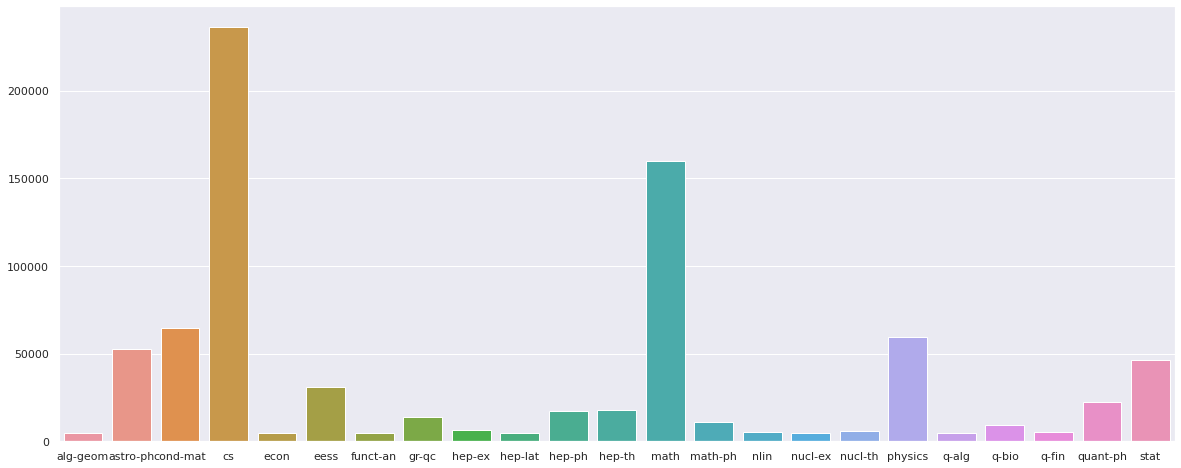

In [48]:
value_counts_y_train_ns = list(y_train_ns.value_counts().sort_index())

label_list = list(range(0, 23))
category_list = le.inverse_transform(label_list)

sns.set(rc={"figure.figsize":(20, 8)})
sns.barplot(x = category_list, y = value_counts_y_train_ns)

In [49]:
print(value_counts_y_train_ns)

[5000, 52863, 64595, 236253, 5000, 30897, 5000, 14031, 6691, 5000, 17286, 17735, 159911, 11014, 5442, 5000, 5996, 59654, 5000, 9477, 5348, 22654, 46177]


Hence, we have oversampled the value with count < 25_000 to 25_000, now we have to undersample the data with count  > 50_000 to 50_000

In [50]:
count_dict_undersample = {}
threshold = 10_000
for i in range(23):
  if value_counts_y_train_ns[i] > threshold:
    count_dict_undersample[i] = threshold
  else:
    count_dict_undersample[i] = value_counts_y_train_ns[i]
count_dict_undersample

{0: 5000,
 1: 10000,
 2: 10000,
 3: 10000,
 4: 5000,
 5: 10000,
 6: 5000,
 7: 10000,
 8: 6691,
 9: 5000,
 10: 10000,
 11: 10000,
 12: 10000,
 13: 10000,
 14: 5442,
 15: 5000,
 16: 5996,
 17: 10000,
 18: 5000,
 19: 9477,
 20: 5348,
 21: 10000,
 22: 10000}

In [51]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(count_dict_undersample)
X_train_under, y_train_under = under_sampler.fit_resample(X_train_ns, y_train_ns)

/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy={0: 5000, 1: 10000, 2: 10000, 3: 10000, 4: 5000, 5: 10000, 6: 5000, 7: 10000, 8: 6691, 9: 5000, 10: 10000, 11: 10000, 12: 10000, 13: 10000, 14: 5442, 15: 5000, 16: 5996, 17: 10000, 18: 5000, 19: 9477, 20: 5348, 21: 10000, 22: 10000} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


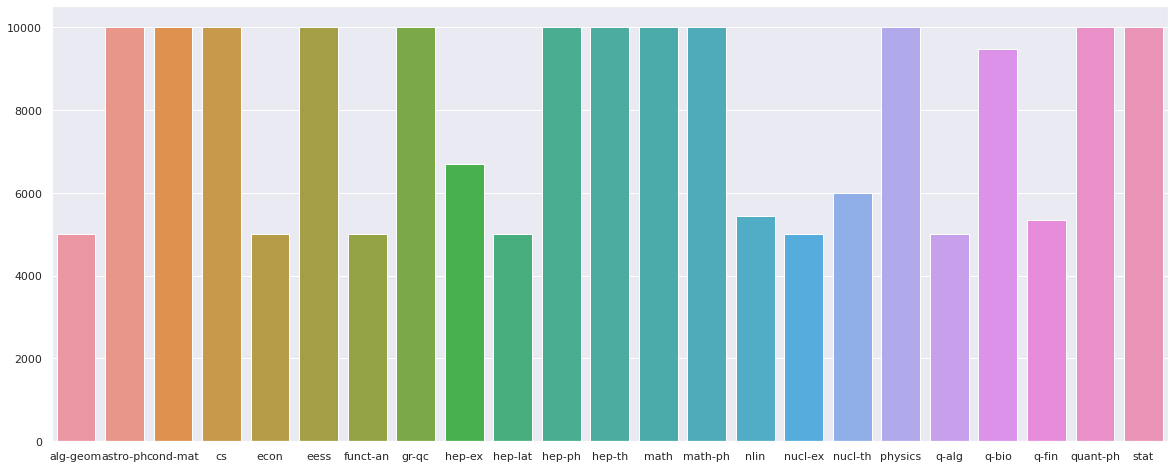

In [52]:
value_counts_y_train_under = list(y_train_under.value_counts().sort_index())

label_list = list(range(0, 23))
category_list = le.inverse_transform(label_list)

sns.set(rc={"figure.figsize":(20, 8)})
sns.barplot(x = category_list, y = value_counts_y_train_under)

Still, data seems to be unbalanced

# One Hot Encoding for y data

In [53]:
y_train_under

0          0
1          0
2          0
3          0
4          0
          ..
182949    22
182950    22
182951    22
182952    22
182953    22
Name: label, Length: 182954, dtype: int64

In [54]:
y_val

550242    21
830836    22
435827     3
627769     3
323439     2
          ..
253152    22
772867    22
338086     1
822905     3
552400     3
Name: label, Length: 86124, dtype: int64

In [55]:
from keras.utils import np_utils
y_train_enc = np_utils.to_categorical(y_train_under)
N_CLASSES = len(y_train_enc[0])
y_val_enc = np_utils.to_categorical(y_val, num_classes=N_CLASSES)

In [56]:
N_CLASSES

23

## Model

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras import regularizers
import tensorflow as tf
import tensorflow_addons as tfa

In [58]:
N_CLASSES, MAX_PAD_LENGTH

(23, 140)

In [72]:
def build_model(n_classes = N_CLASSES, pad_length = MAX_PAD_LENGTH):
  model = Sequential([
    Embedding(UNIQUE_WORD_COUNT, output_dim = 64, input_length = pad_length),
    LSTM(units = 32, dropout = 0.3),
    Dense(128, activation='relu', kernel_initializer= 'glorot_uniform'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(n_classes, activation='softmax')
  ])

  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
  model.compile(
      loss='categorical_crossentropy', 
      optimizer=optimizer, 
      metrics=[tf.keras.metrics.CategoricalAccuracy(),
                tfa.metrics.F1Score(num_classes=n_classes, average='macro'),
                tfa.metrics.FBetaScore(beta=2.0, num_classes=n_classes, average='macro')])
  model.summary()
  return model

In [73]:
train_padded.shape

(775110, 140)

In [74]:
train_padded.shape[1]

140

In [75]:
model = build_model(n_classes = N_CLASSES, pad_length = MAX_PAD_LENGTH)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 140, 64)           1920000   
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 128)               4224      
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 23)                2967      
                                                      

In [76]:
EPOCHS = 10

In [77]:
history = model.fit(X_train_under, y_train_enc, batch_size=32,epochs=EPOCHS, validation_data=(val_padded, y_val_enc))

Epoch 1/10
5718/5718 [==============================] - 73s 12ms/step - loss: 1.8524 - categorical_accuracy: 0.3418 - f1_score: 0.3192 - fbeta_score: 0.3211 - val_loss: 1.6385 - val_categorical_accuracy: 0.3857 - val_f1_score: 0.2544 - val_fbeta_score: 0.2756
Epoch 2/10
5718/5718 [==============================] - 69s 12ms/step - loss: 1.4966 - categorical_accuracy: 0.4626 - f1_score: 0.4423 - fbeta_score: 0.4462 - val_loss: 1.5803 - val_categorical_accuracy: 0.3375 - val_f1_score: 0.2528 - val_fbeta_score: 0.2890
Epoch 3/10
5718/5718 [==============================] - 70s 12ms/step - loss: 1.3138 - categorical_accuracy: 0.5296 - f1_score: 0.5189 - fbeta_score: 0.5217 - val_loss: 1.4196 - val_categorical_accuracy: 0.4756 - val_f1_score: 0.3404 - val_fbeta_score: 0.3808
Epoch 4/10
5718/5718 [==============================] - 69s 12ms/step - loss: 1.1383 - categorical_accuracy: 0.6093 - f1_score: 0.6190 - fbeta_score: 0.6204 - val_loss: 1.3058 - val_categorical_accuracy: 0.5223 - val_f1_

In [85]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/One hot DNN V1/model"
file_path = "model_v1.pth"
model.save(folder_path + file_path)

In [78]:
import pickle

In [81]:
# save the history of the model
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/One hot DNN V1/history"
with open(folder_path, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [84]:
# read the history
with open(folder_path, "rb") as file_pi:
    history = pickle.load(file_pi)

In [92]:
def historyVisualization(history):
  #plot the training and validation accuracy and losss at each epoch
  loss = history['loss']
  val_loss = history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'y', label="Training Loss")
  plt.plot(epochs, val_loss, 'r', label = "Validation Loss")
  plt.title('Training and Validation Loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  print()

  acc = history['categorical_accuracy'] 
  val_acc = history['val_categorical_accuracy']
  plt.plot(epochs, acc, 'y', label = "Traning Accuracy")
  plt.plot(epochs, val_acc, 'r', label = "Validation Accuracy")
  plt.title("Training and Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  print()

  acc = history['f1_score'] 
  val_acc = history['val_f1_score']
  plt.plot(epochs, acc, 'y', label = "Traning F1-score")
  plt.plot(epochs, val_acc, 'r', label = "Validation F1-score")
  plt.title("Training and Validation F1-score")
  plt.xlabel("Epochs")
  plt.ylabel("F1-score")
  plt.legend()
  plt.show()

  print()
  
  acc = history['fbeta_score'] 
  val_acc = history['val_fbeta_score']
  plt.plot(epochs, acc, 'y', label = "Traning fbeta-score")
  plt.plot(epochs, val_acc, 'r', label = "Validation fbeta-score")
  plt.title("Training and Validation fbeta-score")
  plt.xlabel("Epochs")
  plt.ylabel("Fbeta-score")
  plt.legend()
  plt.show()

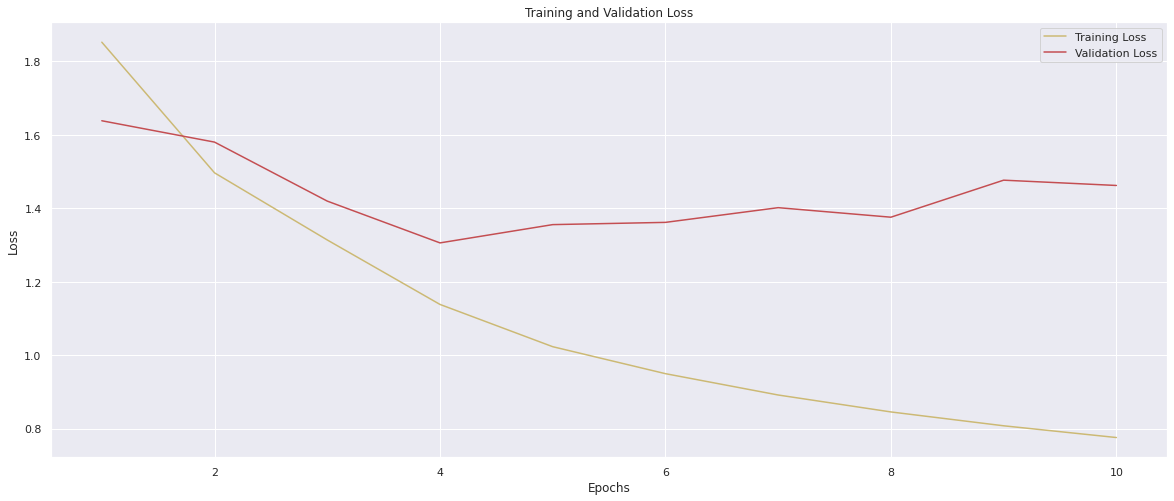

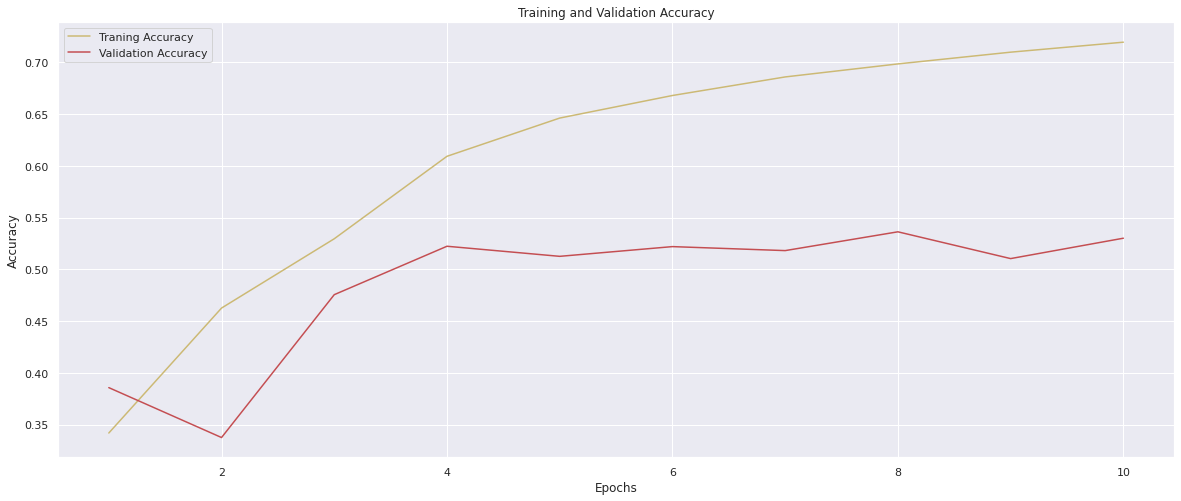

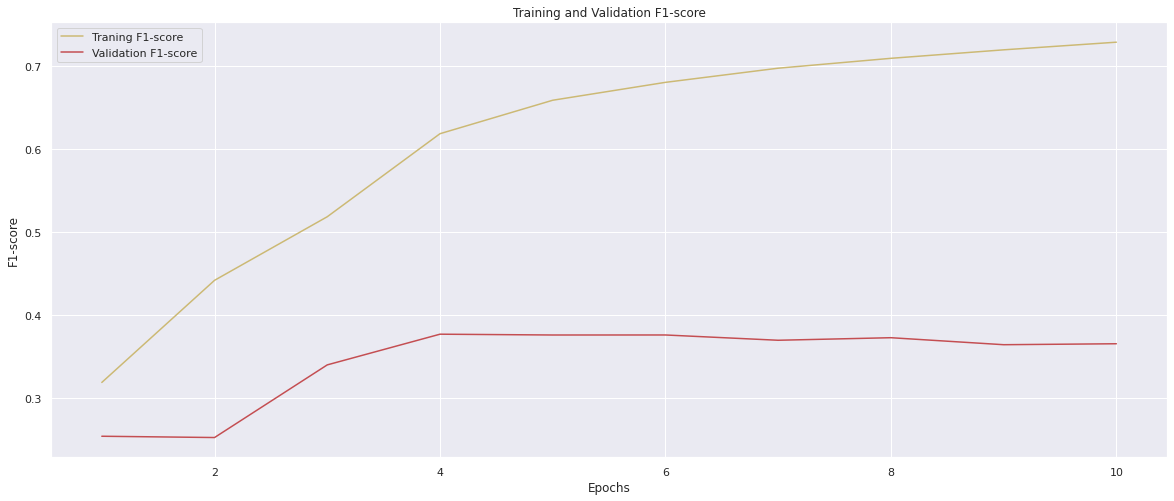

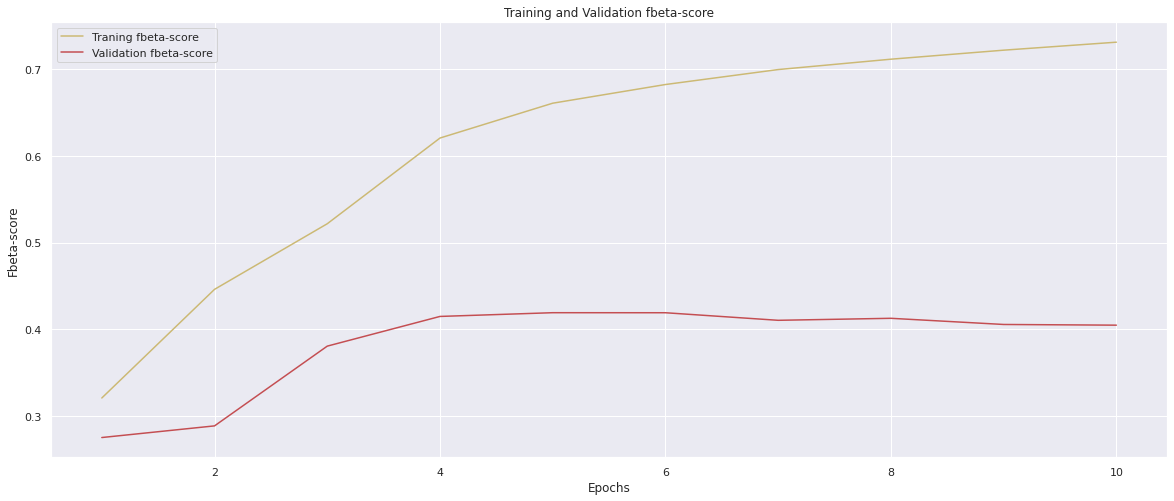

In [93]:
historyVisualization(history)

# Load model and predict for submission

In [165]:
from keras.models import load_model

In [166]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/One hot DNN V1/model"
file_path = "model_v1.pth"
loaded_model = load_model(folder_path + file_path)

In [167]:
test_file_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/test.csv" 
test_df = pd.read_csv(test_file_path)

In [168]:
test_df.head()

,id,title,abstract
0,2107.01095,Who Votes for Library Bonds? A Principal Compo...,Previous research has shown a relationship b...
1,1906.08519,Crystal structure and the magnetic properties ...,We synthesized the 5d1-transition metal oxid...
2,2105.05523,Trimmed extreme value estimators for censored ...,We consider estimation of the extreme value ...
3,1906.08731,Gray-box Monitoring of Hyperproperties (Extend...,"Many important system properties, particular..."
4,1703.08445,On the sectional curvature along central confi...,In this paper we characterize planar central...


In [169]:
test_df["text"] = test_df.title.astype("str") + test_df.abstract.astype("str")

In [170]:
test_df.drop(["title", "abstract"], axis = 1, inplace = True)
test_df.head()


,id,text
0,2107.01095,Who Votes for Library Bonds? A Principal Compo...
1,1906.08519,Crystal structure and the magnetic properties ...
2,2105.05523,Trimmed extreme value estimators for censored ...
3,1906.08731,Gray-box Monitoring of Hyperproperties (Extend...
4,1703.08445,On the sectional curvature along central confi...


### Test data preprocessing

In [171]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_word_collection=set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [172]:
from tqdm import tqdm
tqdm.pandas()

In [173]:
def text_preprocess(text):
  # Changes to lower case
  text = text.lower()

  # conver the - to white spaces
  # eg small-scale = small scale, two-dimension = two dimension
  text = text.replace("-", " ")

  # Remove all punctuations
  text = ''.join(c for c in text if c not in string.punctuation)

  # Remove all stop words
  text = ' '. join(word for word in text.split() if word not in stop_word_collection)

  # Remove all numbers and words containing numbers
  # text = re.sub(r'\w*\d\w*', ' ', text).strip()
  
  # Stemming of all words
  text = [lemmatizer.lemmatize(word) for word in text.split()]
  text = ' '.join(text)
  return text

In [174]:
test_df["text"][0]

'Who Votes for Library Bonds? A Principal Component Exploration  Previous research has shown a relationship between voter characteristics and\nvoter support for tax bonds. These findings, however, are difficult to\ninterpret because of the high degree of collinearity across the measures. From\n13 demographic measures of voters in a library bond election, seven independent\nprincipal components were extracted which accounted for 95 percent of the\nvariance. Whereas the direct demographic measures showed inconsistent\nrelationships with voting, the principal components of low SES, college\nexperience, female and service job were related to affirmative voting, while\nhigh home value was related to negative voting.\n'

In [175]:
text_preprocess(test_df["text"][0])

'vote library bond principal component exploration previous research shown relationship voter characteristic voter support tax bond finding however difficult interpret high degree collinearity across measure 13 demographic measure voter library bond election seven independent principal component extracted accounted 95 percent variance whereas direct demographic measure showed inconsistent relationship voting principal component low s college experience female service job related affirmative voting high home value related negative voting'

In [176]:
test_df["text"] = test_df["text"].progress_apply(text_preprocess)

100%|██████████| 45328/45328 [00:25<00:00, 1753.78it/s]


In [177]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
file_path = "preprocessed_test_data_lemmatizer.csv"
test_df.to_csv(folder_path + file_path, index = False)

In [178]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45328 entries, 0 to 45327
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45328 non-null  object
 1   text    45328 non-null  object
dtypes: object(2)
memory usage: 708.4+ KB


In [179]:
test_df.head()

,id,text
0,2107.01095,vote library bond principal component explorat...
1,1906.08519,crystal structure magnetic property 5d transit...
2,2105.05523,trimmed extreme value estimator censored heavy...
3,1906.08731,gray box monitoring hyperproperties extended v...
4,1703.08445,sectional curvature along central configuratio...


### Tokenization of test data

In [180]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
tokenizer_path = 'tokenizer.pickle'
with open(folder_path + tokenizer_path, 'rb') as handle:
    tokenizer = pickle.load(handle)

In [181]:
MAX_PAD_LENGTH = 140

In [182]:
X_test = test_df.text
X_test

0        vote library bond principal component explorat...
1        crystal structure magnetic property 5d transit...
2        trimmed extreme value estimator censored heavy...
3        gray box monitoring hyperproperties extended v...
4        sectional curvature along central configuratio...
                               ...                        
45323    towards automated machine learning evaluation ...
45324    defect deferred correction method based subgri...
45325    learning safe neural network controller barrie...
45326    learning semantics enriched representation via...
45327    intelligent reflecting surface massive device ...
Name: text, Length: 45328, dtype: object

In [183]:
test_sequences = tokenizer.texts_to_sequences(X_test)
print(test_sequences[0])
test_padded = pad_sequences(test_sequences, maxlen = MAX_PAD_LENGTH, padding = 'post', truncating = 'post')
print(test_padded[0])

[5821, 1748, 2320, 1685, 194, 1204, 265, 215, 244, 698, 5004, 379, 5004, 411, 7337, 2320, 372, 66, 906, 2435, 27, 323, 21814, 357, 153, 1874, 3875, 153, 5004, 1748, 2320, 4513, 3107, 355, 1685, 194, 1380, 5461, 3039, 3420, 991, 1484, 553, 3875, 153, 1482, 4144, 698, 4031, 1685, 194, 71, 5804, 8312, 1381, 6367, 817, 2890, 279, 7744, 4031, 27, 3321, 90, 279, 730, 4031]
[ 5821  1748  2320  1685   194  1204   265   215   244   698  5004   379
  5004   411  7337  2320   372    66   906  2435    27   323 21814   357
   153  1874  3875   153  5004  1748  2320  4513  3107   355  1685   194
  1380  5461  3039  3420   991  1484   553  3875   153  1482  4144   698
  4031  1685   194    71  5804  8312  1381  6367   817  2890   279  7744
  4031    27  3321    90   279   730  4031     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0    

In [184]:
y_test_predict = loaded_model.predict(test_padded)

1417/1417 [==============================] - 6s 4ms/step


In [185]:
type(y_test_predict)

numpy.ndarray

In [186]:
y_test_predict.shape

(45328, 23)

In [187]:
y_test_predict[0], y_test_predict[1]

(array([2.9507127e-08, 1.1020065e-05, 1.5693434e-04, 2.9758436e-03,
        8.3567840e-01, 4.7804153e-04, 7.0494650e-08, 1.7039603e-05,
        3.9066323e-05, 5.2580231e-06, 4.2902397e-05, 3.1407526e-05,
        1.3802428e-03, 8.8117195e-05, 4.8474787e-05, 2.4559080e-05,
        2.5802454e-05, 7.9755083e-04, 2.3996643e-07, 5.3365988e-04,
        1.2141748e-01, 5.7623180e-05, 3.6190238e-02], dtype=float32),
 array([1.3974671e-09, 7.6322955e-05, 8.9200133e-01, 4.4939901e-05,
        1.3550661e-05, 4.1168438e-05, 5.9502392e-10, 5.7585232e-05,
        1.3065752e-05, 2.9800669e-05, 5.0412254e-05, 1.2141481e-04,
        4.7844755e-05, 1.5515898e-04, 1.0220833e-03, 1.0677007e-04,
        3.9608410e-04, 1.0242564e-01, 3.4899232e-09, 9.8246173e-04,
        1.5092524e-05, 2.3447946e-03, 5.4478078e-05], dtype=float32))

In [188]:
y_predicted = np.argmax(y_test_predict, axis = 1)

In [189]:
y_predicted

array([ 4,  2, 22, ...,  5,  3,  5])

In [190]:
predicted_labels = le.inverse_transform(y_predicted)
print(predicted_labels)

['econ' 'cond-mat' 'stat' ... 'eess' 'cs' 'eess']


In [191]:
len(predicted_labels)

45328

In [192]:
test_df.head()

,id,text
0,2107.01095,vote library bond principal component explorat...
1,1906.08519,crystal structure magnetic property 5d transit...
2,2105.05523,trimmed extreme value estimator censored heavy...
3,1906.08731,gray box monitoring hyperproperties extended v...
4,1703.08445,sectional curvature along central configuratio...


In [193]:
test_df["category"] = predicted_labels

In [194]:
test_df.head()

,id,text,category
0,2107.01095,vote library bond principal component explorat...,econ
1,1906.08519,crystal structure magnetic property 5d transit...,cond-mat
2,2105.05523,trimmed extreme value estimator censored heavy...,stat
3,1906.08731,gray box monitoring hyperproperties extended v...,cs
4,1703.08445,sectional curvature along central configuratio...,math


In [195]:
len(test_df)

45328

In [196]:
import random

In [197]:
def viewTextCategory(df, number = 10):
  sample_df = df.sample(number)
  for text, category in zip(sample_df["text"], sample_df["category"]):
    print("========================")
    print(category)
    print(text)

In [198]:
viewTextCategory(test_df, number = 5)

astro-ph
effect magnetic field laterally colliding plasma plume experimental investigation laser produced colliding plasma aluminium target presence external magnetic field vacuum done characteristic parameter line emission plasma plume presence magnetic field compared field free case axial expansion plasma slowed presence magnetic field compared field free case contrary field free case sharp interaction zone observed higher electron temperature increased ionic line emission singly well doubly ionized aluminium attributed joule heating phenomenon
astro-ph
sitelle halpha imaging spectroscopy z025 cluster emission line galaxy detection ionized gas offset abell 2390 abell 2465 environmental effect crucial understanding evolution galaxy dense environment galaxy cluster using large field view sitelle unique imaging fourier transform spectrograph cfht able obtain 2d spectral information large complete sample cluster galaxy infall region describe pipeline developed identify emission line gala

In [199]:
test_df.head()

,id,text,category
0,2107.01095,vote library bond principal component explorat...,econ
1,1906.08519,crystal structure magnetic property 5d transit...,cond-mat
2,2105.05523,trimmed extreme value estimator censored heavy...,stat
3,1906.08731,gray box monitoring hyperproperties extended v...,cs
4,1703.08445,sectional curvature along central configuratio...,math


In [200]:
submission_df = test_df.drop("text", axis = 1)

In [202]:
submission_df.head(10)

,id,category
0,2107.01095,econ
1,1906.08519,cond-mat
2,2105.05523,stat
3,1906.08731,cs
4,1703.08445,math
5,2106.13444,cond-mat
6,1812.05778,cs
7,1911.0796,cs
8,1808.07576,cs
9,1902.02865,cs


In [201]:
test_df.head(10)

,id,text,category
0,2107.01095,vote library bond principal component explorat...,econ
1,1906.08519,crystal structure magnetic property 5d transit...,cond-mat
2,2105.05523,trimmed extreme value estimator censored heavy...,stat
3,1906.08731,gray box monitoring hyperproperties extended v...,cs
4,1703.08445,sectional curvature along central configuratio...,math
5,2106.13444,surface density state semi infinite topologica...,cond-mat
6,1812.05778,trivial yet optimal solution vertex fault tole...,cs
7,1911.0796,alphamu search algorithm game bridge alphamu a...,cs
8,1808.07576,cooperative sgd unified framework design analy...,cs
9,1902.02865,eyeorg platform crowdsourcing web quality expe...,cs


In [205]:
test_df.iloc[1].text

'crystal structure magnetic property 5d transition metal oxide aoso4 k rb c synthesized 5d1 transition metal oxide aoso4 k rb c solid state reaction performed structure determination magnetic heat capacity measurement found crystallize scheelite k rb quasi scheelite structure c comprising distorted diamond lattice septivalent o d1 ion tetrahedrally coordinated four oxide ion without local inversion symmetry hence antisymmetric spin orbit coupling expected crystal k rb compound wei temperature theta 66 18 k effective magnetic moment mueff 144 145 mubos antiferromagnetic transition temperature tn 369 210 k respectively contrast c compound theta 12 k mueff 08 mubos without magnetic transition 2 k instead exhibiting first order structural transition t 1525 k decline o moment 173 mubos simple d1 spin particularly c likely originate antiparallel orbital moment although spin orbit coupling generally quenched low lying e orbitals'